In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()

In [6]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)
# reflect the tables

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

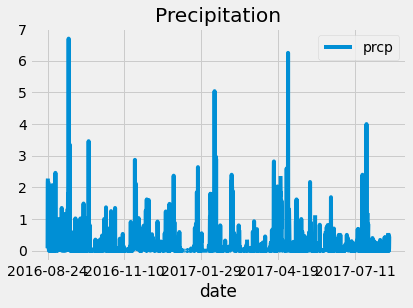

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
session.query(measurement.date).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date, measurement.prcp]
prcp_query = session.query(*sel).\
    filter(measurement.date > "2016-08-23").\
    order_by(measurement.date).all()
prcp_query
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df = pd.DataFrame(prcp_query,columns=['date','prcp'])
df.set_index('date',inplace=True)
df.plot(title = "Precipitation")
plt.show()
# Use Pandas Plotting with Matplotlib to plot the data


In [12]:
stat = session.query(measurement.station).\
    group_by(measurement.station).all()
df3 = pd.DataFrame(stat)
station_dict = df3.to_dict()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# Design a query to show how many stations are available in this dataset?
session.query(station).count()

9

In [15]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel2 = [measurement.station,
        func.count(measurement.station)]
station_count = session.query(*sel2).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

print(f'the station with most observations is {station_count[0][0]} with {station_count[0][1]} observations')
station_count

the stattion with most observations is USC00519281 with 2772 observations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_id = station_count[0][0]
# station id with most observations is = USC00519281
sel3 = [func.min(measurement.tobs),
        func.max(measurement.tobs),
        func.avg(measurement.tobs)]
most_obs_station = session.query(*sel3).\
    filter(measurement.station == station_id).all()

most_obs_station
highest_ob_station = pd.DataFrame(most_obs_station, columns=['minimum','maximum','average'])
index = [station_id]
highest_ob_station.index = index
highest_ob_station

,minimum,maximum,average
USC00519281,54.0,85.0,71.663781


('USC00519397', 1752)
USC00519397


<AxesSubplot:ylabel='Frequency'>

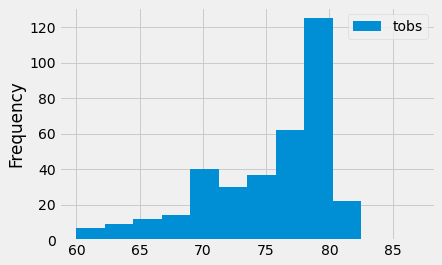

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel4 = [measurement.station,
        func.count(measurement.tobs)]
highest_temp_obs = session.query(*sel4).\
    group_by(measurement.tobs).\
    order_by(func.count(measurement.tobs).desc()).first()
print(highest_temp_obs)

highest_temp_station = highest_temp_obs[0]

print(highest_temp_station)

data = session.query(measurement.date,measurement.tobs).\
    filter(measurement.date > '2016-08-23').\
    filter(measurement.station == highest_temp_station).\
    order_by(measurement.date).all()

recent_temps = pd.DataFrame(data)
recent_temps = recent_temps.set_index('date')
recent_temps = recent_temps.sort_index(ascending=True)

recent_temps.plot(kind='hist', bins=12)

In [18]:
#Part 2

In [19]:
sel4 = [measurement.station,
        func.count(measurement.tobs)]
highest_temp_obs = session.query(*sel4).\
    group_by(measurement.tobs).\
    order_by(func.count(measurement.tobs).desc()).all()
print(highest_temp_obs)
highest_temp_station = highest_temp_obs[0]
data = session.query(measurement.date,measurement.tobs).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()

recent_temps = pd.DataFrame(data)





[('USC00519397', 1752), ('USC00519397', 1654), ('USC00519397', 1625), ('USC00519397', 1606), ('USC00519397', 1601), ('USC00519397', 1425), ('USC00519397', 1375), ('USC00519397', 1257), ('USC00519397', 1159), ('USC00519397', 1103), ('USC00519397', 785), ('USC00519397', 739), ('USC00519397', 614), ('USC00519397', 603), ('USC00519397', 440), ('USC00519397', 381), ('USC00519397', 355), ('USC00519397', 240), ('USC00519397', 186), ('USC00519397', 169), ('USC00519397', 135), ('USC00519397', 81), ('USC00519397', 77), ('USC00519397', 49), ('USC00519397', 36), ('USC00519397', 31), ('USC00519397', 20), ('USC00519523', 18), ('USC00519397', 12), ('USC00519397', 11), ('USC00519397', 4), ('USC00511918', 4), ('USC00511918', 1), ('USC00519281', 1), ('USC00511918', 1)]


In [28]:
sel6 = [measurement.date, measurement.tobs]
tmps = session.query(*sel6).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()
tmps1 = pd.DataFrame(tmps)
tmps1 = tmps1.set_index('date')
temps = tmps1.to_dict()
temps

{'tobs': {'2016-08-24': 77.0,
  '2016-08-25': 80.0,
  '2016-08-26': 80.0,
  '2016-08-27': 75.0,
  '2016-08-28': 73.0,
  '2016-08-29': 78.0,
  '2016-08-30': 77.0,
  '2016-08-31': 78.0,
  '2016-09-01': 80.0,
  '2016-09-02': 80.0,
  '2016-09-03': 78.0,
  '2016-09-04': 78.0,
  '2016-09-05': 78.0,
  '2016-09-06': 73.0,
  '2016-09-07': 74.0,
  '2016-09-08': 80.0,
  '2016-09-09': 79.0,
  '2016-09-10': 77.0,
  '2016-09-11': 80.0,
  '2016-09-12': 76.0,
  '2016-09-13': 79.0,
  '2016-09-14': 75.0,
  '2016-09-15': 79.0,
  '2016-09-16': 78.0,
  '2016-09-17': 79.0,
  '2016-09-18': 78.0,
  '2016-09-19': 78.0,
  '2016-09-20': 76.0,
  '2016-09-21': 74.0,
  '2016-09-22': 77.0,
  '2016-09-23': 78.0,
  '2016-09-24': 79.0,
  '2016-09-25': 79.0,
  '2016-09-26': 77.0,
  '2016-09-27': 80.0,
  '2016-09-28': 78.0,
  '2016-09-29': 78.0,
  '2016-09-30': 78.0,
  '2016-10-01': 77.0,
  '2016-10-02': 79.0,
  '2016-10-03': 79.0,
  '2016-10-04': 79.0,
  '2016-10-05': 79.0,
  '2016-10-06': 75.0,
  '2016-10-07': 76.0,
  

In [ ]:
from flask import Flask, jsonify



In [ ]:
app = Flask(__name__)


#precipitation data
sel5 = [measurement.date, measurement.prcp]
new_query = session.query(*sel5).\
    order_by(measurement.date).all()
df2 = pd.DataFrame(new_query,columns=['date','prcp'])
df2.set_index('date',inplace=True)
date_prcp = df2.to_dict()

#stations data
stat = session.query(measurement.station).\
    group_by(measurement.station).all()
df3 = pd.DataFrame(stat)
station_dict = df3.to_dict()

@app.route("/")
def home():
    print("server received home page request")
    return "Home Page"
    return " "
    return "/api/v1.0/precipitation"
    return "/api/v1.0/stations"
    return "/api/v1.0/tobs"
    return "/api/v1.0/<start>"
    return "/api/v1.0/<start>/<end>"

@app.route("/api/v1.0/precipitation")
def prcp():
    print("server received prcp page request")
    return jsonify(date_prcp)

@app.route("/api/v1.0/stations")
def stations():
    print("server has received stations page request")
    return jsonify(station_dict)

@app.route("/api/v1.0/tobs")
def tobs():
    print("server has received tobs page request")
    
@app.route("/api/v1.0/<start>")
def start():
    print("server has received start page request")


@app.route("/api/v1.0/<start>/<end>")
def startend():
    print("server has received start-end page request")


if __name__ = "__main__":
    app.run(debug=True)
    

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
